In [733]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import svm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [661]:
df = pd.read_csv('pirate_data.csv', index_col=0)
df.head()

,DATETIME (LOCAL),DATETIME (UTC),DATE (LT),DATE (UTC),REGION,COUNTRY,INCIDENT TYPE,VESSEL TYPE,MAERSK?,VESSEL ACTIVITY LOCATION,LAT,LONG,TIMEZONE,TIME OF DAY,ATTACKS,ATTACK SUCCESS
1,2016-01-30 23:34:00,2016-01-30 22:34:00,2016-01-30,2016-01-30,WEST AFRICA,NIGERIA,"FAILED ATTACK, HIJACKING",CONTAINER SHIP,0,OFF SHORE,3.000000,6.250000,Africa/Lagos,EVENING,1,0
2,2016-01-29 23:40:00,2016-01-29 22:40:00,2016-01-29,2016-01-29,WEST AFRICA,NIGERIA,KIDNAP/RANSOM AT SEA,PRODUCT TANKER,0,OFF SHORE,2.500000,5.750000,Africa/Lagos,EVENING,1,1
3,2016-01-28 03:00:00,2016-01-28 02:00:00,2016-01-28,2016-01-28,SOUTH ASIA,INDIA,"FAILED ATTACK, ROBBERY",PRODUCT TANKER,0,ANCHORAGE,22.816667,70.116667,Asia/Kolkata,NIGHT,1,0
4,NaN,NaN,2016-01-27,2016-01-27,HORN OF AFRICA/ GULF OF ADEN,SOMALIA,SUSPICIOUS ACTIVITY AT SEA,NaN,0,OFF SHORE,13.998747,54.112792,Asia/Riyadh,UNKNOWN,1,0
5,2016-01-25 23:55:00,2016-01-25 22:55:00,2016-01-25,2016-01-25,SOUTH AMERICA,VENEZUELA,THEFT AT ANCHORAGE,GENERAL CARGO VESSEL,0,ANCHORAGE,10.267500,-63.432500,America/Caracas,EVENING,1,1


In [662]:
df.columns

Index(['DATETIME (LOCAL)', 'DATETIME (UTC)', 'DATE (LT)', 'DATE (UTC)',
       'REGION', 'COUNTRY', 'INCIDENT TYPE', 'VESSEL TYPE', 'MAERSK?',
       'VESSEL ACTIVITY LOCATION', 'LAT', 'LONG', 'TIMEZONE', 'TIME OF DAY',
       'ATTACKS', 'ATTACK SUCCESS'],
      dtype='object')

In [663]:
df.isna().sum()

DATETIME (LOCAL)            220
DATETIME (UTC)              220
DATE (LT)                     0
DATE (UTC)                    0
REGION                        0
COUNTRY                       0
INCIDENT TYPE                 0
VESSEL TYPE                 164
MAERSK?                       0
VESSEL ACTIVITY LOCATION    126
LAT                           0
LONG                          0
TIMEZONE                      0
TIME OF DAY                   0
ATTACKS                       0
ATTACK SUCCESS                0
dtype: int64

In [664]:
df['VESSEL ACTIVITY LOCATION'].value_counts()

OFF SHORE    421
ANCHORAGE    198
BERTH         57
Name: VESSEL ACTIVITY LOCATION, dtype: int64

In [665]:
df['ATTACK SUCCESS'].value_counts()

1    500
0    302
Name: ATTACK SUCCESS, dtype: int64

In [666]:
df['VESSEL TYPE'].value_counts()


BULK CARRIER                          134
PRODUCT TANKER                        107
CONTAINER SHIP                         60
TANKER                                 34
TUG                                    34
FISHING VESSEL                         33
MERCHANT VESSEL                        30
CRUDE OIL TANKER                       28
GENERAL CARGO VESSEL                   28
PASSENGER VESSEL                       25
SUPPLY VESSEL                          25
CHEMICAL TANKER                        15
LPG TANKER                             10
UNKNOWN                                10
TRAWLER                                 7
VEHICLE CARRIER                         7
BARGE                                   5
DREDGER                                 4
FISHING TRAWLER                         4
REEFER                                  3
HEAVY LIFT VESSEL                       3
LNG TANKER                              2
SECURITY VESSEL                         2
PIPE-LAYER                        

In [667]:
df['VESSEL TYPE'].loc[~df['VESSEL TYPE'].isin(['BULK CARRIER','PRODUCT TANKER','CONTAINER SHIP'])] = 'OTHER'

C:\Users\ooles\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [668]:
df['VESSEL TYPE'].value_counts()


OTHER             501
BULK CARRIER      134
PRODUCT TANKER    107
CONTAINER SHIP     60
Name: VESSEL TYPE, dtype: int64

In [669]:
df['ATTACKS'].value_counts()

1    802
Name: ATTACKS, dtype: int64

In [670]:
df.loc[pd.isnull(df['DATETIME (LOCAL)']), 'TIME OF DAY'].value_counts()

UNKNOWN    178
MORNING     25
EVENING     17
Name: TIME OF DAY, dtype: int64

In [671]:
df1 = df.copy()

In [672]:
df1

,DATETIME (LOCAL),DATETIME (UTC),DATE (LT),DATE (UTC),REGION,COUNTRY,INCIDENT TYPE,VESSEL TYPE,MAERSK?,VESSEL ACTIVITY LOCATION,LAT,LONG,TIMEZONE,TIME OF DAY,ATTACKS,ATTACK SUCCESS
1,2016-01-30 23:34:00,2016-01-30 22:34:00,2016-01-30,2016-01-30,WEST AFRICA,NIGERIA,"FAILED ATTACK, HIJACKING",CONTAINER SHIP,0,OFF SHORE,3.000000,6.250000,Africa/Lagos,EVENING,1,0
2,2016-01-29 23:40:00,2016-01-29 22:40:00,2016-01-29,2016-01-29,WEST AFRICA,NIGERIA,KIDNAP/RANSOM AT SEA,PRODUCT TANKER,0,OFF SHORE,2.500000,5.750000,Africa/Lagos,EVENING,1,1
3,2016-01-28 03:00:00,2016-01-28 02:00:00,2016-01-28,2016-01-28,SOUTH ASIA,INDIA,"FAILED ATTACK, ROBBERY",PRODUCT TANKER,0,ANCHORAGE,22.816667,70.116667,Asia/Kolkata,NIGHT,1,0
4,NaN,NaN,2016-01-27,2016-01-27,HORN OF AFRICA/ GULF OF ADEN,SOMALIA,SUSPICIOUS ACTIVITY AT SEA,OTHER,0,OFF SHORE,13.998747,54.112792,Asia/Riyadh,UNKNOWN,1,0
5,2016-01-25 23:55:00,2016-01-25 22:55:00,2016-01-25,2016-01-25,SOUTH AMERICA,VENEZUELA,THEFT AT ANCHORAGE,OTHER,0,ANCHORAGE,10.267500,-63.432500,America/Caracas,EVENING,1,1
6,2016-01-25 01:30:00,2016-01-25 00:30:00,2016-01-25,2016-01-25,SOUTH ASIA,INDIA,ARMED ROBBERY AT SEA,PRODUCT TANKER,0,OFF SHORE,22.783333,70.033333,Asia/Kolkata,NIGHT,1,1
7,NaN,NaN,2016-01-25,2016-01-25,WEST AFRICA,NIGERIA,ARMED ROBBERY AT SEA,OTHER,0,OFF SHORE,4.833333,5.666667,Africa/Lagos,UNKNOWN,1,1
8,2016-01-24 05:18:00,2016-01-24 04:18:00,2016-01-24,2016-01-24,WEST AFRICA,CONGO,"FAILED ATTACK, THEFT",PRODUCT TANKER,0,ANCHORAGE,-4.158333,13.431667,Africa/Lagos,NIGHT,1,0
9,2016-01-23 06:30:00,2016-01-23 05:30:00,2016-01-23,2016-01-23,SOUTH ASIA,INDIA,THEFT AT ANCHORAGE,OTHER,0,ANCHORAGE,17.650000,83.400000,Asia/Kolkata,MORNING,1,1
10,2016-01-22 01:00:00,2016-01-22 00:00:00,2016-01-22,2016-01-22,WEST AFRICA,COTE D'IVOIRE,THEFT AT ANCHORAGE,OTHER,0,ANCHORAGE,5.268679,-3.968054,Africa/Abidjan,NIGHT,1,1


In [673]:
# Convert to datetime, extract hour, month and weekday
df1['DATE (LT)'] = pd.to_datetime(df1['DATE (LT)'])
df1['DATETIME (LOCAL)'] = pd.to_datetime(df1['DATETIME (LOCAL)'])
df1['ATTACK HOUR'] = df1['DATETIME (LOCAL)'].dt.hour
df1['ATTACK MONTH'] = df1['DATE (LT)'].dt.month
df1['ATTACK WEEKDAY'] = df1['DATE (LT)'].dt.weekday

# Delete certain columns
cols_to_delete = ['DATETIME (UTC)','DATETIME (LOCAL)','DATE (UTC)','INCIDENT TYPE','ATTACKS']
df1.drop(columns=cols_to_delete, inplace=True)

In [674]:
df1.head()

,DATE (LT),REGION,COUNTRY,VESSEL TYPE,MAERSK?,VESSEL ACTIVITY LOCATION,LAT,LONG,TIMEZONE,TIME OF DAY,ATTACK SUCCESS,ATTACK HOUR,ATTACK MONTH,ATTACK WEEKDAY
1,2016-01-30,WEST AFRICA,NIGERIA,CONTAINER SHIP,0,OFF SHORE,3.000000,6.250000,Africa/Lagos,EVENING,0,23.0,1,5
2,2016-01-29,WEST AFRICA,NIGERIA,PRODUCT TANKER,0,OFF SHORE,2.500000,5.750000,Africa/Lagos,EVENING,1,23.0,1,4
3,2016-01-28,SOUTH ASIA,INDIA,PRODUCT TANKER,0,ANCHORAGE,22.816667,70.116667,Asia/Kolkata,NIGHT,0,3.0,1,3
4,2016-01-27,HORN OF AFRICA/ GULF OF ADEN,SOMALIA,OTHER,0,OFF SHORE,13.998747,54.112792,Asia/Riyadh,UNKNOWN,0,NaN,1,2
5,2016-01-25,SOUTH AMERICA,VENEZUELA,OTHER,0,ANCHORAGE,10.267500,-63.432500,America/Caracas,EVENING,1,23.0,1,0


In [675]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 1 to 802
Data columns (total 14 columns):
DATE (LT)                   802 non-null datetime64[ns]
REGION                      802 non-null object
COUNTRY                     802 non-null object
VESSEL TYPE                 802 non-null object
MAERSK?                     802 non-null int64
VESSEL ACTIVITY LOCATION    676 non-null object
LAT                         802 non-null float64
LONG                        802 non-null float64
TIMEZONE                    802 non-null object
TIME OF DAY                 802 non-null object
ATTACK SUCCESS              802 non-null int64
ATTACK HOUR                 582 non-null float64
ATTACK MONTH                802 non-null int64
ATTACK WEEKDAY              802 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 94.0+ KB


In [676]:
def other(col):
    count = df1[col].value_counts()
    rare = count[count<20]
    rare = list(rare.index)
    df1[col] = df1[col].replace(rare,'OTHER')
other('VESSEL TYPE')
other('COUNTRY')


In [677]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 1 to 802
Data columns (total 14 columns):
DATE (LT)                   802 non-null datetime64[ns]
REGION                      802 non-null object
COUNTRY                     802 non-null object
VESSEL TYPE                 802 non-null object
MAERSK?                     802 non-null int64
VESSEL ACTIVITY LOCATION    676 non-null object
LAT                         802 non-null float64
LONG                        802 non-null float64
TIMEZONE                    802 non-null object
TIME OF DAY                 802 non-null object
ATTACK SUCCESS              802 non-null int64
ATTACK HOUR                 582 non-null float64
ATTACK MONTH                802 non-null int64
ATTACK WEEKDAY              802 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 94.0+ KB


In [678]:
df['VESSEL TYPE'].value_counts()

OTHER             501
BULK CARRIER      134
PRODUCT TANKER    107
CONTAINER SHIP     60
Name: VESSEL TYPE, dtype: int64

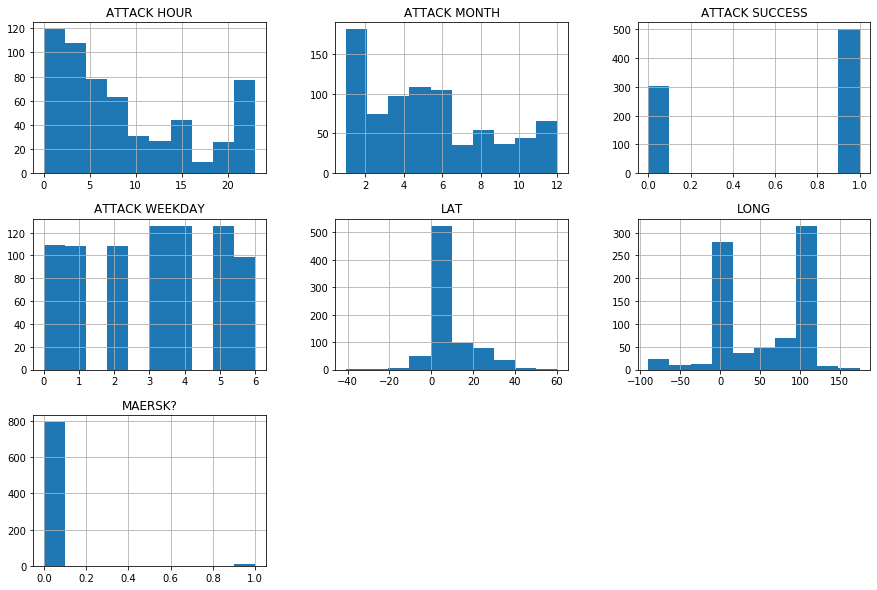

In [679]:
df1.hist(figsize = (15,10));

In [680]:
# Replace attack hour by mean morning hour when attack takes place in the morning
df1.loc[(df1['TIME OF DAY']=='MORNING') & (pd.isnull(df1['ATTACK HOUR'])), 'ATTACK HOUR'] \
= round(df1.loc[df1['TIME OF DAY'] == 'MORNING', 'ATTACK HOUR'].mean(),0)

# Replace attack hour by mean evening hour when attack takes place in the evening
df1.loc[(df1['TIME OF DAY']=='EVENING') & (pd.isnull(df1['ATTACK HOUR'])), 'ATTACK HOUR'] \
= round(df1.loc[df1['TIME OF DAY'] == 'EVENING', 'ATTACK HOUR'].mean(),0)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 1 to 802
Data columns (total 14 columns):
DATE (LT)                   802 non-null datetime64[ns]
REGION                      802 non-null object
COUNTRY                     802 non-null object
VESSEL TYPE                 802 non-null object
MAERSK?                     802 non-null int64
VESSEL ACTIVITY LOCATION    676 non-null object
LAT                         802 non-null float64
LONG                        802 non-null float64
TIMEZONE                    802 non-null object
TIME OF DAY                 802 non-null object
ATTACK SUCCESS              802 non-null int64
ATTACK HOUR                 624 non-null float64
ATTACK MONTH                802 non-null int64
ATTACK WEEKDAY              802 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 94.0+ KB


In [681]:
df1.head()

,DATE (LT),REGION,COUNTRY,VESSEL TYPE,MAERSK?,VESSEL ACTIVITY LOCATION,LAT,LONG,TIMEZONE,TIME OF DAY,ATTACK SUCCESS,ATTACK HOUR,ATTACK MONTH,ATTACK WEEKDAY
1,2016-01-30,WEST AFRICA,NIGERIA,CONTAINER SHIP,0,OFF SHORE,3.000000,6.250000,Africa/Lagos,EVENING,0,23.0,1,5
2,2016-01-29,WEST AFRICA,NIGERIA,PRODUCT TANKER,0,OFF SHORE,2.500000,5.750000,Africa/Lagos,EVENING,1,23.0,1,4
3,2016-01-28,SOUTH ASIA,INDIA,PRODUCT TANKER,0,ANCHORAGE,22.816667,70.116667,Asia/Kolkata,NIGHT,0,3.0,1,3
4,2016-01-27,HORN OF AFRICA/ GULF OF ADEN,OTHER,OTHER,0,OFF SHORE,13.998747,54.112792,Asia/Riyadh,UNKNOWN,0,NaN,1,2
5,2016-01-25,SOUTH AMERICA,OTHER,OTHER,0,ANCHORAGE,10.267500,-63.432500,America/Caracas,EVENING,1,23.0,1,0


In [682]:
df1.columns

Index(['DATE (LT)', 'REGION', 'COUNTRY', 'VESSEL TYPE', 'MAERSK?',
       'VESSEL ACTIVITY LOCATION', 'LAT', 'LONG', 'TIMEZONE', 'TIME OF DAY',
       'ATTACK SUCCESS', 'ATTACK HOUR', 'ATTACK MONTH', 'ATTACK WEEKDAY'],
      dtype='object')

In [683]:
df1 = df1.drop(['MAERSK?', 'DATE (LT)', 'TIMEZONE'], axis=1)

In [684]:
X=df1.drop(['ATTACK SUCCESS'],axis=1)
X=df1.drop(['ATTACK HOUR'],axis=1)
y=df1["ATTACK SUCCESS"]


In [685]:
X.head()

,REGION,COUNTRY,VESSEL TYPE,VESSEL ACTIVITY LOCATION,LAT,LONG,TIME OF DAY,ATTACK SUCCESS,ATTACK MONTH,ATTACK WEEKDAY
1,WEST AFRICA,NIGERIA,CONTAINER SHIP,OFF SHORE,3.000000,6.250000,EVENING,0,1,5
2,WEST AFRICA,NIGERIA,PRODUCT TANKER,OFF SHORE,2.500000,5.750000,EVENING,1,1,4
3,SOUTH ASIA,INDIA,PRODUCT TANKER,ANCHORAGE,22.816667,70.116667,NIGHT,0,1,3
4,HORN OF AFRICA/ GULF OF ADEN,OTHER,OTHER,OFF SHORE,13.998747,54.112792,UNKNOWN,0,1,2
5,SOUTH AMERICA,OTHER,OTHER,ANCHORAGE,10.267500,-63.432500,EVENING,1,1,0


In [686]:
df1.isna().sum()

REGION                        0
COUNTRY                       0
VESSEL TYPE                   0
VESSEL ACTIVITY LOCATION    126
LAT                           0
LONG                          0
TIME OF DAY                   0
ATTACK SUCCESS                0
ATTACK HOUR                 178
ATTACK MONTH                  0
ATTACK WEEKDAY                0
dtype: int64

In [687]:
df1 = df1.fillna('UNKNOWN')

In [688]:
df1['VESSEL ACTIVITY LOCATION'].value_counts()
df1.shape

(802, 11)

In [689]:
df1.isna().sum()

REGION                      0
COUNTRY                     0
VESSEL TYPE                 0
VESSEL ACTIVITY LOCATION    0
LAT                         0
LONG                        0
TIME OF DAY                 0
ATTACK SUCCESS              0
ATTACK HOUR                 0
ATTACK MONTH                0
ATTACK WEEKDAY              0
dtype: int64

In [690]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,LAT,LONG,ATTACK SUCCESS,ATTACK MONTH,ATTACK WEEKDAY
LAT,1,0.0144352,0.126436,0.0509972,0.050356
LONG,0.0144352,1,-0.0496732,0.164512,0.058401
ATTACK SUCCESS,0.126436,-0.0496732,1,0.000242873,-0.0462034
ATTACK MONTH,0.0509972,0.164512,0.000242873,1,-0.0110996
ATTACK WEEKDAY,0.050356,0.058401,-0.0462034,-0.0110996,1


In [691]:
df1['ATTACK SUCCESS'].value_counts()

1    500
0    302
Name: ATTACK SUCCESS, dtype: int64

In [692]:
X=df1.drop(['REGION'],axis=1)

In [693]:
df['VESSEL TYPE'].loc[~df['VESSEL TYPE'].isin(['BULK CARRIER','PRODUCT TANKER','CONTAINER SHIP'])] = 'OTHER'

In [694]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [695]:
X = X.drop('ATTACK HOUR', axis=1)

In [696]:
X.head()

,COUNTRY,VESSEL TYPE,VESSEL ACTIVITY LOCATION,LAT,LONG,TIME OF DAY,ATTACK SUCCESS,ATTACK MONTH,ATTACK WEEKDAY
1,NIGERIA,CONTAINER SHIP,OFF SHORE,3.000000,6.250000,EVENING,0,1,5
2,NIGERIA,PRODUCT TANKER,OFF SHORE,2.500000,5.750000,EVENING,1,1,4
3,INDIA,PRODUCT TANKER,ANCHORAGE,22.816667,70.116667,NIGHT,0,1,3
4,OTHER,OTHER,OFF SHORE,13.998747,54.112792,UNKNOWN,0,1,2
5,OTHER,OTHER,ANCHORAGE,10.267500,-63.432500,EVENING,1,1,0


In [697]:
# list down features based on type
numeric_features = ['LAT', 'LONG']

categorical_features = ['COUNTRY','VESSEL TYPE','VESSEL ACTIVITY LOCATION','ATTACK MONTH', 'ATTACK WEEKDAY','TIME OF DAY']

In [698]:
#The numeric data is standard-scaled
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

#while the categorical data is one-hot encoded
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## KNN

In [699]:
n = [1, 2, 3, 4, 5, 6, 7, 8,9,10]

score_df = pd.DataFrame()
score_df['n'] = n

scores_l1 = []
for k in n:
    KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    model_knn = Pipeline(steps=[('preprocessor', preprocessor),('classifier', KNN)])
    score = np.mean(cross_val_score(model_knn,
                        X_train,
                        y_train.values.ravel(),
                        cv=4,
                        scoring='f1'))
    scores_l1.append(score)
score_df['score'] = scores_l1 



In [700]:
score_df

,n,score
0,1,0.681675
1,2,0.571105
2,3,0.689744
3,4,0.619518
4,5,0.697119
5,6,0.655916
6,7,0.705988
7,8,0.680613
8,9,0.704604
9,10,0.692415


In [728]:
KNN1 = neighbors.KNeighborsClassifier(n_neighbors=7)
best_knn = Pipeline(steps=[('preprocessor', preprocessor),('classifier', KNN1)])
best_knn.fit(X_train,y_train)
knn_score = np.mean(cross_val_score(model_knn,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))
knn_score


0.6924146579234635

In [702]:
best_knn.fit(X_train,y_train)

y_test_pred = best_knn.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.46      0.28      0.35        61
           1       0.65      0.80      0.71       100

    accuracy                           0.60       161
   macro avg       0.55      0.54      0.53       161
weighted avg       0.57      0.60      0.58       161



In [703]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.6024844720496895


### Naive Bayes

In [704]:
NB = naive_bayes.BernoulliNB()
nb_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', NB)])
nb_score = np.mean(cross_val_score(nb_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))



In [705]:
nb_score

0.7199182312876246

In [706]:
nb_model.fit(X_train,y_train.ravel())
nb_pred = nb_model.predict(X_test)
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.40      0.30      0.34        61
           1       0.63      0.73      0.68       100

    accuracy                           0.57       161
   macro avg       0.51      0.51      0.51       161
weighted avg       0.54      0.57      0.55       161



In [707]:
print(metrics.accuracy_score(y_test, nb_pred))

0.5652173913043478


In [708]:
print(nb_model.score(X_test, y_test))

0.5652173913043478


### SVM

In [709]:
lin_svm = svm.LinearSVC()
svm_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', lin_svm)])
svm_score = np.mean(cross_val_score(svm_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [710]:
svm_score

0.7263641956054621

In [711]:
svm_model.fit(X_train,y_train.ravel())
svm_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.47      0.23      0.31        61
           1       0.64      0.84      0.73       100

    accuracy                           0.61       161
   macro avg       0.55      0.53      0.52       161
weighted avg       0.58      0.61      0.57       161



In [712]:
parameters = {'classifier__C': np.linspace(0.001, 1, 100)}
lin_svm_best = svm.LinearSVC()
svm_model_best = Pipeline(steps=[('preprocessor', preprocessor),('classifier', lin_svm_best)])
grid_search = model_selection.GridSearchCV(svm_model_best, parameters,scoring='accuracy',cv=5,n_jobs=-1)

grid_search.fit(X_train, y_train.ravel())
svm_model_best = grid_search.best_estimator_


In [713]:
svm_model_best_score = np.mean(cross_val_score(svm_model_best,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [714]:
svm_model_best_score

0.7646635660989729

In [715]:
svm_model_best.fit(X_train, np.ravel(y_train))

svm_pred_best = svm_model_best.predict(X_test)
print(metrics.classification_report(y_test, svm_pred_best))

              precision    recall  f1-score   support

           0       0.38      0.10      0.16        61
           1       0.62      0.90      0.73       100

    accuracy                           0.60       161
   macro avg       0.50      0.50      0.45       161
weighted avg       0.53      0.60      0.52       161



In [620]:
print(metrics.accuracy_score(y_test, svm_pred_best))

0.5962732919254659


In [721]:
svc = svm.SVC(C=1.0,kernel='rbf',degree=3, gamma='auto')
svc_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', svc)])
svc_score = np.mean(cross_val_score(svc_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [722]:
svc_score

0.7684939581491306

In [723]:
svc_model.fit(X_train, np.ravel(y_train))
svc_test_pred = svc_model.predict(X_test)

In [724]:
print(metrics.classification_report(y_test, svc_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.62      1.00      0.77       100

    accuracy                           0.62       161
   macro avg       0.31      0.50      0.38       161
weighted avg       0.39      0.62      0.48       161



C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [725]:
print(metrics.accuracy_score(y_test, svc_test_pred))

0.6211180124223602


In [730]:
models = ['knn', 'nb', 'svc', 'svm_rbf']

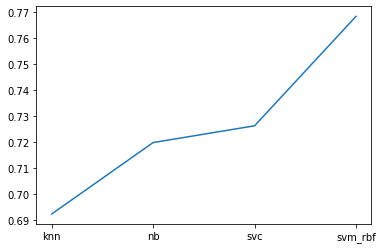

In [731]:
plt.plot(models,[knn_score, nb_score, svm_score, svc_score]);

# Mashrooms

In [630]:
mr = pd.read_csv('agaricus-lepiota.data.csv')
mr.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,3776,5175,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [631]:
X=mr.drop(['p'],axis=1)
columns = ["cap-shape", "cap-surface", "cap-color", "bruises?",
            "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color",
            "stalk-shape", "stalk-root", "stalk-surface-above-ring",
            "stalk-surface-below-ring", "stalk-color-above-ring",
            "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
            "ring-type", "spore-print-color", "population", "habitat"
            ]

X.columns = columns
y=mr["p"]
y = y.replace(['e', 'p'],[0,1])

y.columns = ['edable']



In [632]:
X['stalk-root'].value_counts()

b    3776
?    2480
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

In [633]:
X=X.drop(['stalk-root'], axis=1)

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [635]:
pd.set_option('display.max_columns', 999)
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,s,s,w,w,p,w,o,p,k,n,g



# KNN

In [637]:
n = [1, 2, 3, 4, 5, 6, 7, 8,9,10]

score_df = pd.DataFrame()
score_df['n'] = n

scores_l1 = []
for k in n:
    KNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model_n = Pipeline(steps=[('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore')),('classifier', KNN)])
    score = np.mean(cross_val_score(knn_model_n,
                        X_train,
                        y_train.values.ravel(),
                        cv=4,
                        scoring='f1'))
    scores_l1.append(score)
score_df['score'] = scores_l1 

In [638]:
score_df

,n,score
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,0.999840
6,7,0.999840
7,8,0.999679
8,9,0.999679
9,10,0.999679


In [737]:
param_grid = {"nmaighbours": [3,4,5,6]}
knn=KNN = neighbors.KNeighborsClassifier(n_neighbors=3)
knn=model_selection.GridSearchCV(knn, param_grid, cv=5)



AttributeError: 'GridSearchCV' object has no attribute 'mean_test_score'

In [640]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model = Pipeline(steps=[('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore')),('classifier', KNN)])
score_knn = np.mean(cross_val_score(knn_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [641]:
score_knn

1.0

In [642]:
knn_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehot',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', n_values=None,
                               sparse=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [456]:
prediction_knn = knn_model.predict(X_test)

In [457]:
print(confusion_matrix(y_test,prediction_knn))

[[833   0]
 [  0 792]]


In [458]:
print(metrics.classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [459]:
print(knn_model.score(X_test,y_test))

1.0


In [460]:
print(metrics.accuracy_score(y_test,prediction_knn))

1.0


In [461]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.512615
1    0.487385
Name: p, dtype: float64

### NB

In [643]:
NB = naive_bayes.BernoulliNB()
nb_model = Pipeline(steps=[('onehot',  preprocessing.OneHotEncoder(handle_unknown='ignore')),('classifier', NB)])
nb_score = np.mean(cross_val_score(nb_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))



In [644]:
nb_score

0.9402255545500932

In [645]:
nb_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehot',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', n_values=None,
                               sparse=True)),
                ('classifier',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [406]:
prediction_nb = nb_model.predict(X_test)

In [423]:
print(confusion_matrix(y_test,prediction_nb))

[[822  11]
 [ 78 714]]


In [424]:
print(metrics.classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       833
           1       0.98      0.90      0.94       792

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.95      0.95      1625



In [434]:
print(nb_model.score(X_test,y_test))

0.9452307692307692


In [436]:
print(nb_model.score(X_test,y_test))

0.9452307692307692


In [437]:
print(metrics.accuracy_score(y_test,prediction_nb))

0.9452307692307692


In [439]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.512615
1    0.487385
Name: p, dtype: float64

In [462]:
df_coeff = pd.DataFrame({'feature': nb_model.named_steps['onehot'].get_feature_names(X_train.columns),
              'coefficient': abs(nb_model.named_steps['classifier'].coef_[0])})

In [463]:
df_coeff.sort_values(by='coefficient',ascending=False).head(10)

,feature,coefficient
111,habitat_w,8.04719
16,cap-color_r,8.04719
61,stalk-color-above-ring_e,8.04719
62,stalk-color-above-ring_g,8.04719
64,stalk-color-above-ring_o,8.04719
25,odor_l,8.04719
70,stalk-color-below-ring_e,8.04719
71,stalk-color-below-ring_g,8.04719
22,odor_a,8.04719
73,stalk-color-below-ring_o,8.04719


### SVM

In [646]:
lin_svm = svm.LinearSVC()
svm_model = Pipeline(steps=[('onehot',  preprocessing.OneHotEncoder(handle_unknown='ignore')),('classifier', lin_svm)])
svm_score = np.mean(cross_val_score(svm_model,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [328]:
svm_score

1.0

In [647]:
parameters = {'classifier__C': np.linspace(0.001, 1, 100)}
lin_svm_best = svm.LinearSVC()
svm_model_best = Pipeline(steps=[('onehot',  preprocessing.OneHotEncoder(handle_unknown='ignore')),('classifier', lin_svm_best)])
grid_search = model_selection.GridSearchCV(svm_model_best, parameters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
svm_model_best = grid_search.best_estimator_


In [429]:
svm_model_best_score = np.mean(cross_val_score(svm_model_best,
                    X_train,
                    y_train.values.ravel(),
                    cv=4,
                    scoring='f1'))

In [430]:
svm_model_best_score

1.0

In [431]:
svm_model_best.fit(X_train, np.ravel(y_train))
svm_pred = svm_model_best.predict(X_test)

In [432]:
print(metrics.classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [433]:
print(metrics.accuracy_score(y_test, svm_pred))

1.0


In [438]:
print(svm_model_best.score(X_test,y_test))

1.0


In [443]:
df_coeff = pd.DataFrame({'feature': svm_model_best.named_steps['onehot'].get_feature_names(X_train.columns),
              'coefficient': abs(svm_model_best.named_steps['classifier'].coef_[0])})

In [444]:
df_coeff.sort_values(by='coefficient',ascending=False).head(10)

,feature,coefficient
95,spore-print-color_r,1.502555
23,odor_c,1.211563
25,odor_l,1.044763
22,odor_a,1.043062
27,odor_n,0.834551
24,odor_f,0.748077
86,ring-type_f,0.569907
52,stalk-surface-above-ring_k,0.528124
111,habitat_w,0.524752
96,spore-print-color_u,0.513192
